<a href="https://colab.research.google.com/github/kushv16/Audio-Sentiment-Analysis/blob/master/Decision_Tree_w_o_Crema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [25]:
cd "/content/drive/MyDrive/LY Project/"

/content/drive/.shortcut-targets-by-id/1ty6Q2chm7khBo3iSNsdx5NVqeOpCUmjM/LY Project


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/content/drive/MyDrive/LY Project/combo.csv')

df['emotion'].replace({'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4,'sad':5,'surprise':6}, inplace=True)
df['gender'].replace({'female':0,'male':1}, inplace=True)


df.dropna(inplace = True)
df.drop(df[df['dataset'] == 'CREMA-D'].index, inplace = True)

X = df.drop(columns=['path','filename','dataset','duration','age','emotion'])
y = df.emotion.values

In [3]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.9, shuffle=True, stratify=y, random_state=0)

print('Shape of x_tr: ', X_tr.shape)
print('Shape of y_tr: ', y_tr.shape)
print('Shape of x_te: ', X_te.shape)
print('Shape of y_te: ', y_te.shape)

Shape of x_tr:  (8407, 91)
Shape of y_tr:  (8407,)
Shape of x_te:  (935, 91)
Shape of y_te:  (935,)


In [4]:
# Scale the data
from sklearn.preprocessing import StandardScaler

# Create Standard scaler
scaler = StandardScaler()

# Rescale data
X_tr_rescaled = scaler.fit_transform(X_tr)
X_te_rescaled = scaler.transform(X_te)

In [5]:
%%time 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

kfold = KFold(n_splits=5, shuffle=True, random_state=0)

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=kfold, return_train_score=1)
grid_search_cv.fit(X_tr_rescaled, y_tr)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits
CPU times: user 10min 51s, sys: 545 ms, total: 10min 52s
Wall time: 10min 56s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             return_train_score=1, verbose=1)

In [9]:
cv_results = pd.DataFrame(grid_search_cv.cv_results_)

In [17]:
cv_results.shape

(294, 22)

In [12]:
cols = [
    'mean_test_score',
    'param_max_leaf_nodes',
    'param_min_samples_split',
]

# Display fist 10 columns with higher mean validation score
cv_results[cols].sort_values(by="mean_test_score", ascending=False).head()

,mean_test_score,param_max_leaf_nodes,param_min_samples_split
293,0.741642,99,4
292,0.741642,99,3
291,0.741642,99,2
290,0.740334,98,4
289,0.740334,98,3


In [42]:
best_result = cv_results.sort_values(by="mean_test_score", ascending=False).head()
best_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_leaf_nodes,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
293,0.576043,0.080298,0.001228,0.000199,99,4,"{'max_leaf_nodes': 99, 'min_samples_split': 4}",0.744946,0.752081,0.732302,...,0.741642,0.008203,1,0.801636,0.813383,0.811627,0.807910,0.812073,0.809325,0.004253
292,0.489865,0.009061,0.001052,0.000044,99,3,"{'max_leaf_nodes': 99, 'min_samples_split': 3}",0.744946,0.752081,0.732302,...,0.741642,0.008203,1,0.801636,0.813383,0.811627,0.807910,0.812073,0.809325,0.004253
291,0.486807,0.006671,0.001062,0.000073,99,2,"{'max_leaf_nodes': 99, 'min_samples_split': 2}",0.744946,0.752081,0.732302,...,0.741642,0.008203,1,0.801636,0.813383,0.811627,0.807910,0.812073,0.809325,0.004253
290,0.491225,0.012471,0.001027,0.000043,98,4,"{'max_leaf_nodes': 98, 'min_samples_split': 4}",0.744352,0.749703,0.731112,...,0.740334,0.007965,4,0.800297,0.811896,0.810437,0.806869,0.810288,0.807958,0.004170
289,0.590578,0.127027,0.001084,0.000156,98,3,"{'max_leaf_nodes': 98, 'min_samples_split': 3}",0.744352,0.749703,0.731112,...,0.740334,0.007965,4,0.800297,0.811896,0.810437,0.806869,0.810288,0.807958,0.004170


In [36]:
sorted_top_90_cv_results = cv_results[cols].sort_values(by="mean_test_score", ascending=False).head(90)

In [13]:
cv_results.to_csv("/content/drive/MyDrive/LY Project/Result and Analysis/Results on Combined Data Without Crema/Decision Tree/dtree_without_crema_grid_search.csv")

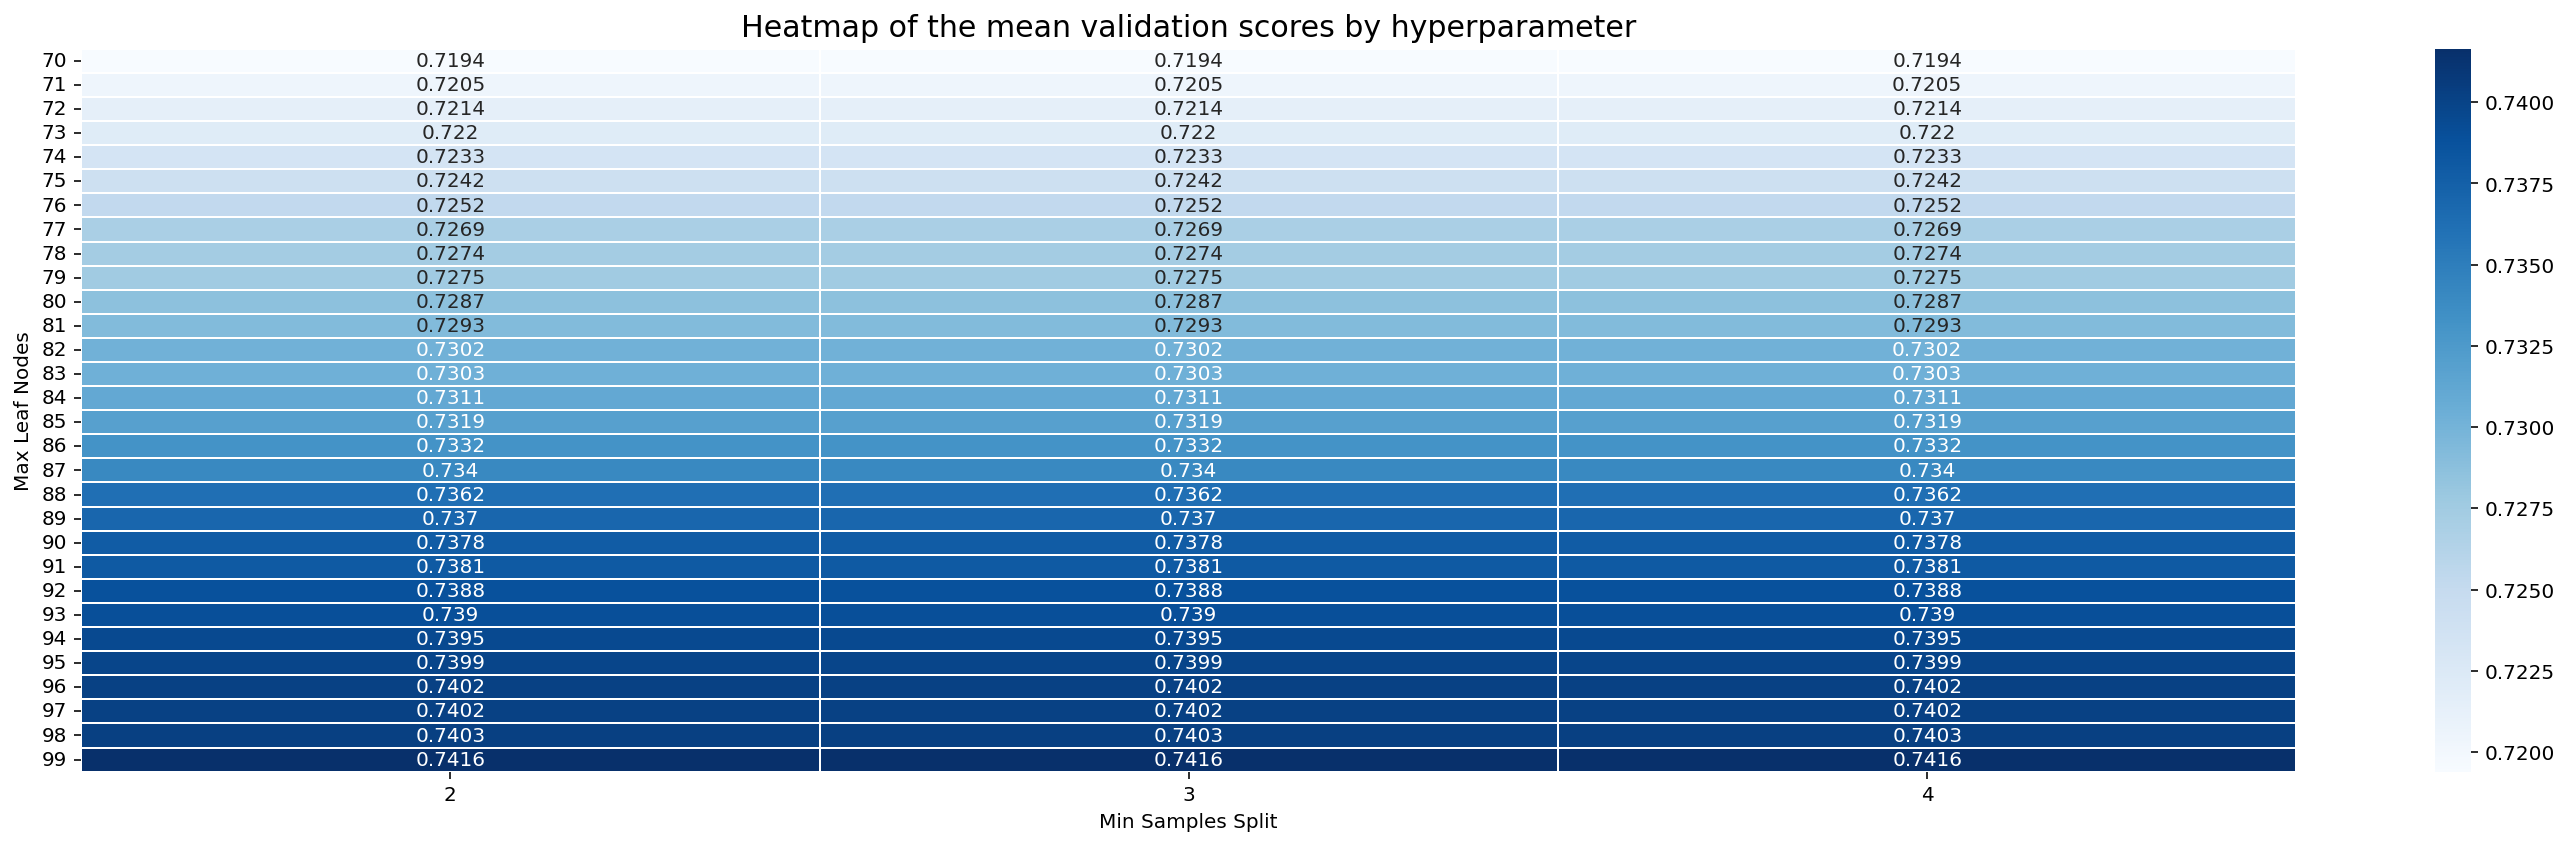

In [38]:
# Create DataFrame to host heatmap data
df_heatmap = sorted_top_90_cv_results[cols].pivot(index='param_max_leaf_nodes', columns='param_min_samples_split', values='mean_test_score') 

# Plotting the results
plt.figure(figsize=(20,6))
sns.heatmap(df_heatmap, annot=True, linewidths=1, fmt=".4g", cmap="Blues")
plt.title('Heatmap of the mean validation scores by hyperparameter', size=15)
plt.xlabel('Min Samples Split')
plt.ylabel('Max Leaf Nodes')
plt.tight_layout()
# plt.savefig('Result and Analysis/Results on Combined Data Without Crema/Decision Tree/dtree_without_crema_heatmap_by_hyperparameters.png')
plt.show()

In [40]:
best_decision_tree = DecisionTreeClassifier(max_leaf_nodes=99, min_samples_split=3)

best_decision_tree.fit(X_tr_rescaled,y_tr)

print('Test accuracy of the Best Decision Tree Classifier: {:.3f}'.format(best_decision_tree.score(X_te_rescaled, y_te)))

Test accuracy of the Best Decision Tree Classifier: 0.726


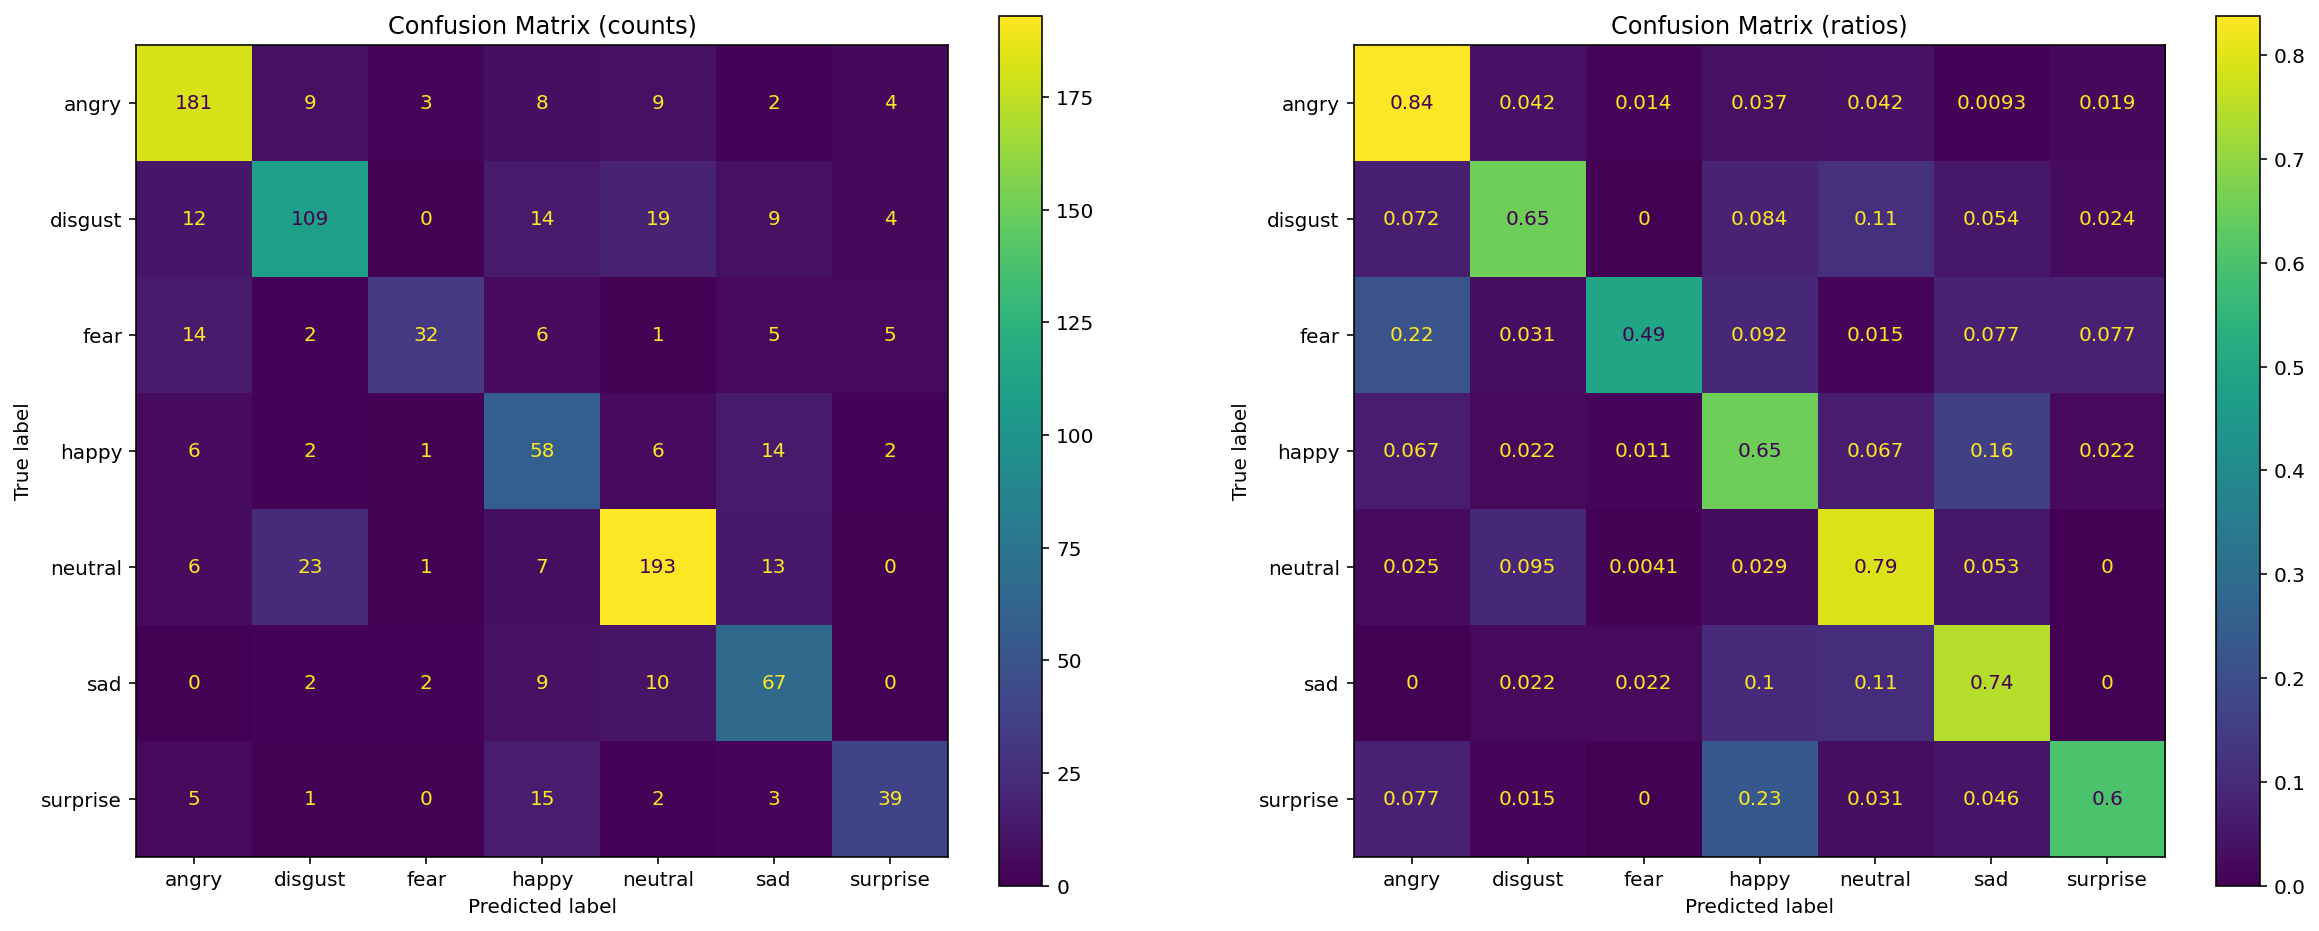

In [43]:
# Predicting the categories
y_probabilities = best_decision_tree.predict_proba(X_te_rescaled)

predicted = []

for i in y_probabilities:
    predicted.append(np.argmax(i))
    
# Define confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

labels = {'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4,'sad':5,'surprise':6}

def plot_confusion_matrices(y_true, y_pred):

    # Create two subplots
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Plots the standard confusion matrix
    ax1.set_title("Confusion Matrix (counts)")
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=labels, ax=ax1)

    # Plots the normalized confusion matrix
    ax2.set_title("Confusion Matrix (ratios)")
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=labels, normalize="true", ax=ax2)
    plt.savefig("/content/drive/MyDrive/LY Project/dtree_without_crema_confusion_matrix.png")
    plt.show()

# Plot confusion matrices
plot_confusion_matrices(y_te, predicted)